M. Amintoosi

# Pruning deep neural networks to make them fast and small

https://jacobgil.github.io/deeplearning/pruning-deep-learning

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os, shutil
from os import listdir
from os.path import isfile, join
from pathlib import Path
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import time
from time import strftime
import datetime
import importlib

In [4]:
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary
import pickle
from torchvision import models

In [5]:
MAT_web_dir = '/content/drive/My Drive/onlyOnWeb/'#sparse/pytorch-pruning/'
datasets_dir = MAT_web_dir + 'datasets/'
model_web_dir = MAT_web_dir + "sparse/HGSPR/models/"
local_output_dir = '/content/drive/My Drive/codes/Sparse/pytorch-pruning/doc/output'
base_dir ='/content/drive/My Drive/codes/Sparse/pytorch-pruning/'
data_dir = '/content/data'
# data_dir = '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data'
# data_file = datasets_dir+'cats_and_dogs_small.zip'
# model_dir = 'C:/temp/tmp/sparse/HGSPR/'
Path(MAT_web_dir).mkdir(parents=True, exist_ok=True)
Path(local_output_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

In [6]:
# os.chdir(data_dir)
# !unzip -q /content/drive/My\ Drive/codes/Sparse/pytorch-pruning/data/painting.zip

In [7]:
# !ls 

In [8]:
os.chdir(base_dir)

In [ ]:
# %%time
# %run finetune_reg_ds.py --train --use-cuda --use-reg

In [10]:
# %%time
# %run finetune_reg_ds.py --prune --use-cuda

In [ ]:
import importlib
from models import vggTrained#alexnet, resnet, vgg
# importlib.reload(alexnet)
# importlib.reload(resnet)
importlib.reload(vggTrained)
num_classes=10
mdlFileName = model_web_dir+"vgg_model_cifar10_gpu.pth"
checkpoint = torch.load(mdlFileName)
start_epoch = checkpoint['epoch']
best_prec1 = checkpoint['best_prec1']
print(start_epoch,best_prec1)

# import vggTrained
# importlib.reload(vggTrained)
model_gpu = vggTrained.__dict__['vgg19']()
model_gpu.features = torch.nn.DataParallel(model_gpu.features)
# model_gpu.cpu()
model_gpu.cuda()
model_gpu.load_state_dict(checkpoint['state_dict'])
print(model_gpu)


233 92.43


NameError: ignored

In [ ]:
# print(model_gpu)
# summary(model_gpu,(3,32,32))
# روش دسترسی به اجزای شبکه در 
# pytorch_prunning is different with HGSR and vgg pretrained model in CIFAR10
# اگه قرار به استفاده از اون مدل از قبل آموزش دیده باشه باید خیلی از موارد اصلاح بشن
# گیر الان عدم همخوانی پارامترهای مدل‌های ساده‌تر با ساختار مدل اینجاس
# برای مدل ۱۶ مشکلی نداریم
# اما زمانش طولانی میشه
filters = 0
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        print(module)
        filters = filters + module.out_channels
filters

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), pa

5504

In [9]:
%%time
%run finetune_painting.py --train --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Using CUDA...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch:  0 / 15
Accuracy : 0.59375
Epoch:  1 / 15
Accuracy : 0.515625
Epoch:  2 / 15
Accuracy : 0.5625
Epoch:  3 / 15
Accuracy : 0.640625
Epoch:  4 / 15
Accuracy : 0.6875
Epoch:  5 / 15
Accuracy : 0.734375
Epoch:  6 / 15
Accuracy : 0.8125
Epoch:  7 / 15
Accuracy : 0.828125
Epoch:  8 / 15
Accuracy : 0.859375
Epoch:  9 / 15
Accuracy : 0.875
Epoch:  10 / 15
Accuracy : 0.875
Epoch:  11 / 15
Accuracy : 0.875
Epoch:  12 / 15
Accuracy : 0.90625
Epoch:  13 / 15
Accuracy : 0.90625
Epoch:  14 / 15
Accuracy : 0.90625
Finished fine tuning.
CPU times: user 48.8 s, sys: 39.8 s, total: 1min 28s
Wall time: 4min 39s


In [14]:
%%time
%run finetune_SpReg.py --train --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Using CUDA...
Epoch:  0 / 15


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.5625
Epoch:  1 / 15
Accuracy : 0.484375
Epoch:  2 / 15
Accuracy : 0.5625
Epoch:  3 / 15
Accuracy : 0.6875
Epoch:  4 / 15
Accuracy : 0.75
Epoch:  5 / 15
Accuracy : 0.859375
Epoch:  6 / 15
Accuracy : 0.875
Epoch:  7 / 15
Accuracy : 0.875
Epoch:  8 / 15
Accuracy : 0.890625
Epoch:  9 / 15
Accuracy : 0.90625
Epoch:  10 / 15
Accuracy : 0.90625
Epoch:  11 / 15
Accuracy : 0.921875
Epoch:  12 / 15
Accuracy : 0.921875
Epoch:  13 / 15
Accuracy : 0.921875
Epoch:  14 / 15
Accuracy : 0.921875
Finished fine tuning.
CPU times: user 44.4 s, sys: 37.5 s, total: 1min 21s
Wall time: 2min 2s


In [16]:
# %%time
# %run finetune_SpReg.py --prune --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

In [15]:
%%time
%run finetune_SpReg.py --train --use-cuda --use-reg --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Using CUDA...
Using Regularization:  HSQGL12
Epoch:  0 / 15


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.5
Epoch:  1 / 15
Accuracy : 0.5
Epoch:  2 / 15
Accuracy : 0.5625
Epoch:  3 / 15
Accuracy : 0.671875
Epoch:  4 / 15
Accuracy : 0.75
Epoch:  5 / 15
Accuracy : 0.78125
Epoch:  6 / 15
Accuracy : 0.828125
Epoch:  7 / 15
Accuracy : 0.84375
Epoch:  8 / 15
Accuracy : 0.875
Epoch:  9 / 15
Accuracy : 0.875
Epoch:  10 / 15
Accuracy : 0.875
Epoch:  11 / 15
Accuracy : 0.890625
Epoch:  12 / 15
Accuracy : 0.90625
Epoch:  13 / 15
Accuracy : 0.9375
Epoch:  14 / 15
Accuracy : 0.9375
Finished fine tuning.
CPU times: user 45.6 s, sys: 38 s, total: 1min 23s
Wall time: 2min 2s


In [ ]:
%%time
%run finetune_SpReg.py --prune --use-cuda --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

Using CUDA...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.9375
Number of prunning iterations to reduce 75% filters 6
Iter:  0 / 6
Ranking filters.. 
Layers that will be prunned {7: 6, 24: 83, 17: 70, 28: 117, 21: 56, 14: 15, 10: 20, 26: 73, 19: 46, 5: 5, 0: 4, 12: 13, 2: 4}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.953125
Fine tuning to recover from prunning iteration.
Epoch:  0 / 10
Accuracy : 0.984375
Epoch:  1 / 10
Accuracy : 0.984375
Epoch:  2 / 10
Accuracy : 0.953125
Epoch:  3 / 10
Accuracy : 0.984375
Epoch:  4 / 10
Accuracy : 0.96875
Epoch:  5 / 10
Accuracy : 0.984375
Epoch:  6 / 10
Accuracy : 0.953125
Epoch:  7 / 10
Accuracy : 0.96875
Epoch:  8 / 10
Accuracy : 0.953125
Epoch:  9 / 10
Accuracy : 0.984375
Finished fine tuning.
Iter:  1 / 6
Ranking filters.. 
Layers that will be prunned {28: 173, 17: 36, 26: 75, 14: 14, 24: 71, 21: 56, 10: 14, 19: 53, 0: 5, 2: 2, 12: 9, 5: 3, 7: 1}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.984375
Fine tuning to recover from prunning iterati

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


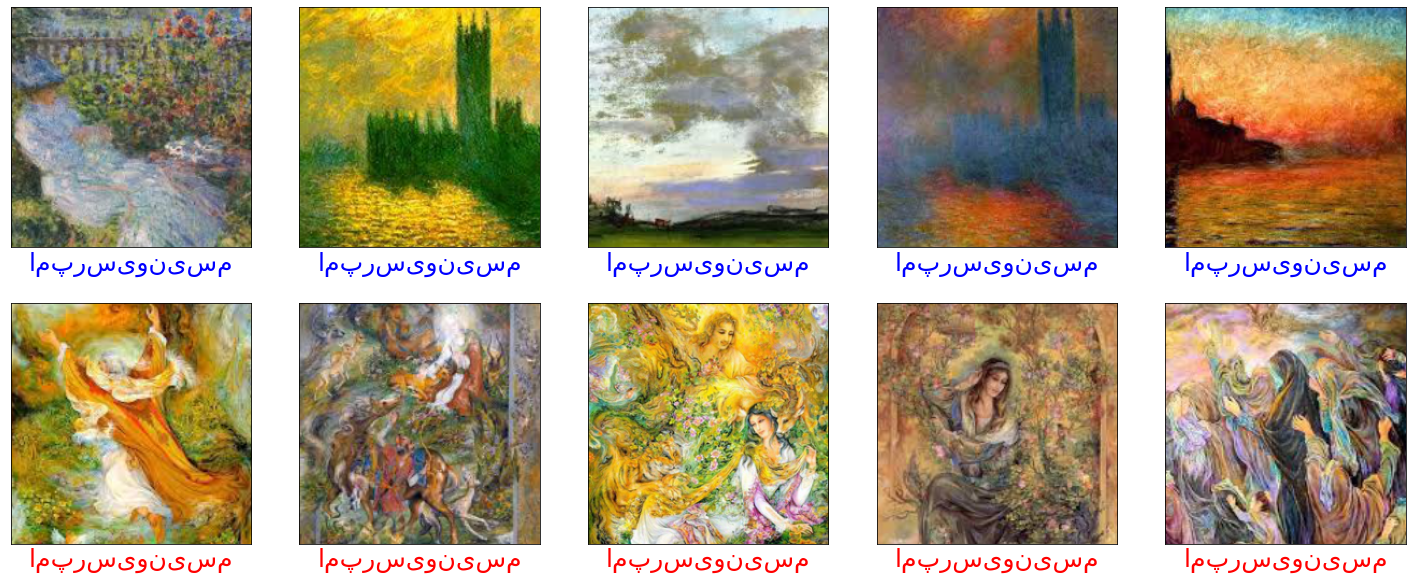

Accuracy : 0.5


In [17]:
%run finetune_SpReg.py --test --use-reg --train_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/train' --test_path '/content/drive/My Drive/codes/Sparse/pytorch-pruning/data/painting/test'

In [ ]:
import importlib
# models_dir = '/content/drive/My Drive/onlyOnWeb/sparse/pytorch-pruning/models/'
# model =  models.vgg16(pretrained=True)
# model = torch.load(models_dir+"painting_model.pt", map_location=lambda storage, loc: storage)
from finetune_reg_ds import ModifiedVGG16Model
# import finetune_reg_ds
from torchsummary import summary
# importlib.reload(finetune_reg_ds)#.ModifiedVGG16Model)
model = ModifiedVGG16Model()
print(model)
net = model.to('cuda')
summary(net, (3, 224, 224))

ModifiedVGG16Model(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, paddin

RuntimeError: ignored

In [ ]:
# models_dir = '/content/drive/My Drive/onlyOnWeb/sparse/pytorch-pruning/models/'
# from torchsummary import summary
# model = torch.load(models_dir+"painting_model_prunned.pt")#,strict=False)
# # print(model)
# net = model.to('cuda')
# summary(net, (3, 224, 224))
# # print(model)

In [ ]:
# %run finetune_SpReg.py --test --train_path data/painting/train --test_path data/painting/test

In [ ]:
# %run finetune_SpReg.py --test --train_path data/painting/train --test_path data/painting/test

In [ ]:
# %run finetune_SpReg.py --test --train_path data/painting/train --test_path data/painting/test